In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Material Balance for Gascap Drive Reservoirs
### (L.P. Dake - Exercise 3.4 page 90 )
N = 115 x 10^6 stb

Pi = Pb = 3330 psia

Assumed m = 0.4

In [2]:
N = 115*(10**6)
ma = 0.4
Boi = 1.2511 
Rsi = 510
Bgi = .00087

In [3]:
data = pd.read_excel('Data.xlsx')

In [4]:
data = pd.DataFrame(data)
data

,Pressure (Psia),Np (MMstb),Rp (scf/stb),Bo (scf/stb),Rs (scf/stb),Bg (rb/scf)
0,3330,NaN,NaN,1.2511,510,0.00087
1,3150,3.295,1050.0,1.2353,477,0.00092
2,3000,5.903,1060.0,1.2222,450,0.00096
3,2850,8.852,1160.0,1.2122,425,0.00101
4,2700,11.503,1235.0,1.2022,401,0.00107
5,2550,14.513,1265.0,1.1922,375,0.00113
6,2400,17.730,1300.0,1.1822,352,0.00120


### F = N (Eo + m Eg)
Where,

F (Underground withdrawal) = Np (Bo + (Rp - Rs)Bg)

Eo (Oil and dissolved gas Expansion) = (Bo - Boi) + (Rsi - Rs)Bg

Eg (Gascap Gas Expansion) = Boi (Bg/Bgi - 1)

Water production and water influx assumed zero

Water and Pore compressibility neglected in contrast to highly compressible Gas

In [5]:
data = data.iloc[1:,:].reset_index().drop('index', axis = 1)
data = data
P = data['Pressure (Psia)']
Np = data['Np (MMstb)']
Rp = data['Rp (scf/stb)']
Bo = data['Bo (scf/stb)']
Rs = data['Rs (scf/stb)']
Bg = data['Bg (rb/scf)']

data['F'] = Np*(Bo+(Rp-Rs)*Bg)
data['Eo'] = (Bo-Boi)+(Rsi-Rs)*Bg
data['Eg'] = Boi*((Bg/Bgi)-1)

F = data['F']
Eo = data['Eo']
Eg = data['Eg']

In [6]:
data

,Pressure (Psia),Np (MMstb),Rp (scf/stb),Bo (scf/stb),Rs (scf/stb),Bg (rb/scf),F,Eo,Eg
0,3150,3.295,1050.0,1.2353,477,0.00092,5.807306,0.01456,0.071902
1,3000,5.903,1060.0,1.2222,450,0.00096,10.671443,0.02870,0.129424
2,2850,8.852,1160.0,1.2122,425,0.00101,17.301677,0.04695,0.201326
3,2700,11.503,1235.0,1.2022,401,0.00107,24.093954,0.06773,0.287609
4,2550,14.513,1265.0,1.1922,375,0.00113,31.898123,0.09365,0.373892
5,2400,17.730,1300.0,1.1822,352,0.00120,41.130054,0.12070,0.474555


Text(0.5, 1.0, 'm = 0.4')

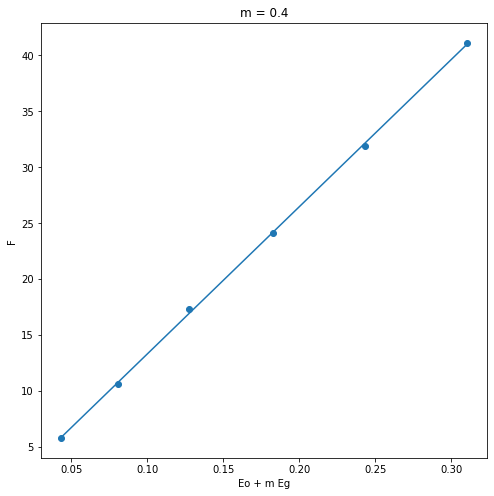

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(Eo+ma*Eg, F)
plt.xlabel('Eo + m Eg')
plt.ylabel('F')
slope, intercept, r_value, p_value, std_err = linregress(Eo+ma*Eg, F)
plt.plot(Eo+ma*Eg, slope*(Eo+ma*Eg)+intercept)
plt.title(f'm = {ma}')

In [8]:
(slope, intercept, r_value)

(131.43722753924322, 0.1787204077146889, 0.9998650345269229)

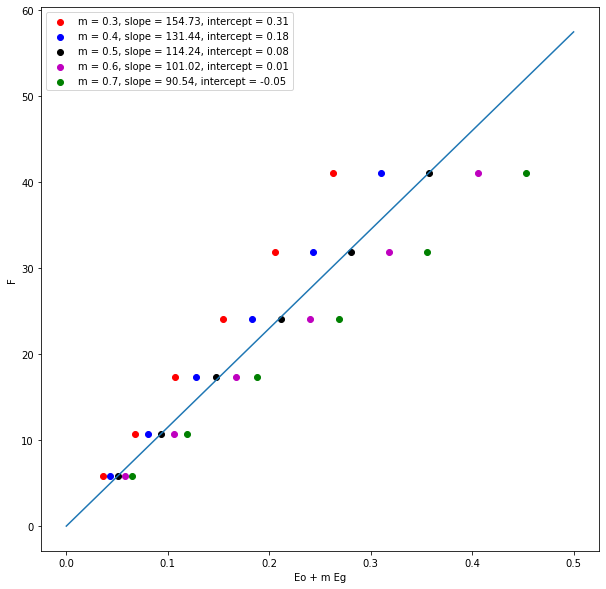

In [9]:
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(Eo+.3*Eg, F)
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(Eo+.4*Eg, F)
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(Eo+.5*Eg, F)
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(Eo+.6*Eg, F)
slope5, intercept5, r_value5, p_value5, std_err5 = linregress(Eo+.7*Eg, F)
plt.figure(figsize=(10,10))

plt.scatter(Eo+.3*Eg, F, color='r', label=f'm = 0.3, slope = {slope1:.2f}, intercept = {intercept1:.2f}')
plt.scatter(Eo+.4*Eg, F, color='b', label=f'm = 0.4, slope = {slope2:.2f}, intercept = {intercept2:.2f}')
plt.scatter(Eo+.5*Eg, F, color='k', label=f'm = 0.5, slope = {slope3:.2f}, intercept = {intercept3:.2f}')
plt.scatter(Eo+.6*Eg, F, color='m', label=f'm = 0.6, slope = {slope4:.2f}, intercept = {intercept4:.2f}')
plt.scatter(Eo+.7*Eg, F, color='g', label=f'm = 0.7, slope = {slope5:.2f}, intercept = {intercept5:.2f}')
plt.plot(np.arange(0,.55,.1), N*(np.arange(0,.55,.1))/(10**6))
plt.xlabel('Eo + m Eg')
plt.ylabel('F')
plt.legend()

### Since, 'm = 0.5' plot is closest to the actual line and others have deviated from the actual trend, so it confirms our case for Gascap size (m) = 0.5. However, m value can be regressed further to fit our actual plot to a more refined m value.
Now, N(Eo + m Eg) = F

So, m = (F/N - Eo)/Eg

NOTE: There will as many m values as there are data points (i.e. 6 in our case). So, m can be taken as the mean (for minimizing square errors, but median must be taken if minimizing absolute errors).

Another method is the univariate regression. Since, Eo, Eg and F are varying, above equation can be written as:

Eoi + m Egi = Fi/N  (For i-th data point)

Now, minimizing the sum of the square of this equation by taking derivative w.r.t. m, gives:

m = sum(Egi (Fi/N - Eoi))/sum(Egi^2)


In [10]:
m = (((F/N/(10**-6))-Eo)/Eg).mean()

In [11]:
slope6, intercept6, r_value6, p_value6, std_err6 = linregress(Eo+m*Eg, F)
(slope6, intercept6, r_value6)

(114.41603027259393, 0.08183538900923892, 0.9998638469810511)

In [12]:
m = (Eg*(F*(10**6)/N-Eo)).sum()/(Eg**2).sum()

In [13]:
slope7, intercept7, r_value7, p_value7, std_err7 = linregress(Eo+m*Eg, F)
(slope7, intercept7, r_value7)

(114.66309732076535, 0.0832406639981329, 0.9998638873524591)